/content/image_captioning_project
Dataset and captions downloaded and unzipped successfully.
Parsing captions file...
Loading official train/test splits...
Total unique images: 8092
Training images: 6000
Test images: 1000
Adapting TextVectorization layer to training captions...
Vocabulary size: 7634
Text preprocessing setup complete.
CNN Encoder (EfficientNetB0) loaded and frozen.
Pre-computing and saving image features to /content/image_captioning_project/features...


100%|██████████| 8092/8092 [37:35<00:00,  3.59it/s]


All image features pre-computed and saved.
Building fast tf.data pipeline from pre-computed features...
Data pipelines created successfully.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 1280)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_and_position… │ (None, None, 256) │  2,570,240 │ input_layer_2[0]… │
│ (TokenAndPositionE… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 1280)   │          0 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_decode… │ (None, None, 256) │  4,334,080 │ token_and_positi… │
│ (TransformerDecode… │                   │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, None,      │  2,570,000 │ transformer_deco… │
│                     │ 10000)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9,474,320 (36.14 MB)

 Trainable params: 9,474,320 (36.14 MB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Training for 10 epochs with 50 steps per epoch...
Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step - accuracy: 0.6435 - loss: 4.5210 - val_accuracy: 0.7673 - val_loss: 1.4680
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.7827 - loss: 1.3640 - val_accuracy: 0.7947 - val_loss: 1.2203
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.7942 - loss: 1.2081 - val_accuracy: 0.7999 - val_loss: 1.1463
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.8038 - loss: 1.1044 - val_accuracy: 0.8062 - val_loss: 1.0875
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.8058 - loss: 1.0584 - val_accuracy: 0.8061 - val_loss: 1.0516
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8097 - loss: 1.0211 - val_accuracy: 0.8058 - val_loss: 1.0460
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.8108 - loss: 1.0090 - val_accuracy: 0.8083 - val_loss: 1.0250
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━

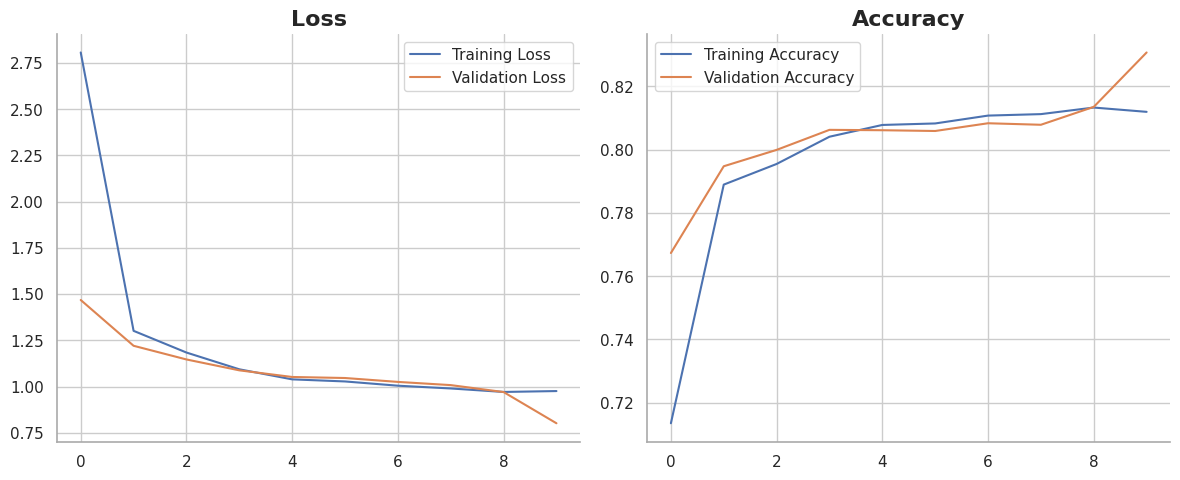


Running inference on test images...

Displaying sample predictions:


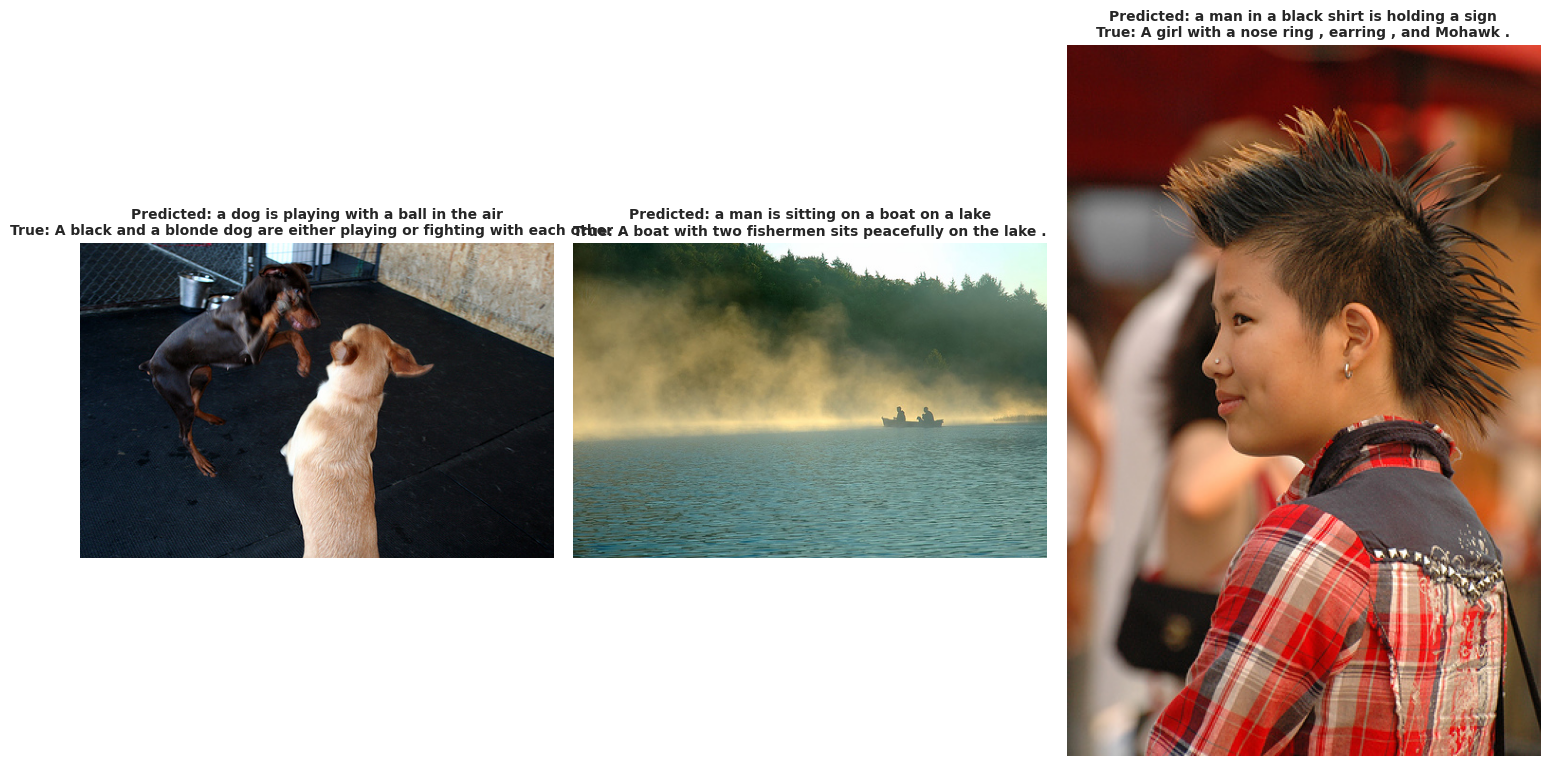


SAVING & DOWNLOADING YOUR TRAINED MODEL
Model saved to: /content/image_captioning_project/image_captioning_decoder.weights.h5


/content/image_captioning_project/image_captioning_decoder.weights.h5

In [2]:
"""
Image Captioning with Transformers
Author: Rhishi Kumar Ayyappan

- Installs all necessary libraries (tensorflow, seaborn).
- Downloads the 'Flickr8k' dataset from a reliable public URL (no API key needed).
- Unzips the data and parses the captions.txt file.
- **Proactively uses the official train/test split files to prevent errors.**
- **Proactively uses a VERY small number of steps per epoch for a fast demo.**
- Creates a robust data pipeline using tf.data.
- Implements text preprocessing with a TextVectorization layer.
- Uses a pre-trained, FROZEN EfficientNetB0 as the image feature extractor.
- Builds a complete Transformer Decoder from scratch using tf.keras layers.
- Trains the model to generate captions for images.
- **Proactively fixes a tensor/numpy type mismatch in the inference loop.**
- Visualizes the results on test images.
"""

# =============================
# SECTION 1: Install Libraries & Imports
# =============================
# This cell installs/updates the required packages
!pip install -q tensorflow tensorflow-datasets seaborn

import os
import re
import warnings
import string
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers
from IPython.display import display, Image, HTML, FileLink
import seaborn as sns
import numpy as np
import collections
import zipfile
import cv2
from tqdm import tqdm # Import tqdm

# Suppress warnings
warnings.filterwarnings("ignore")

# Set a modern, consistent, colorblind-friendly style
sns.set_theme(style="whitegrid", palette="deep", font_scale=1.1)
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 13,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'axes.titleweight': 'bold',
    'legend.fontsize': 11,
    'axes.edgecolor': '#AAAAAA',
    'axes.linewidth': 1.2
})

# =============================
# SECTION 2: Config & Constants
# =============================
# Direct download link for Flickr8k dataset (1.1GB)
DATA_URL = "https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip"
CAPTIONS_URL = "https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip"

BATCH_SIZE = 64
IMG_SIZE = (299, 299)
VOCAB_SIZE = 10000  # Max vocabulary size
SEQ_LENGTH = 40     # Max caption length
EMBED_DIM = 256     # Embedding dimension for text
FF_DIM = 256        # Feed-forward network hidden dim
NUM_HEADS = 4       # Number of attention heads
BUFFER_SIZE = 1000  # For shuffling

# --- TRAINING SPEED FIX (AGGRESSIVE) ---
EPOCHS = 10         # Reduced to 10 epochs
STEPS_PER_EPOCH = 50   # Drastically reduced for a fast demo
VALIDATION_STEPS = 10   # Drastically reduced validation
# --- END FIX ---

# Set a local project directory in the Colab session
PROJECT_DIR = "/content/image_captioning_project"
IMAGES_DIR = os.path.join(PROJECT_DIR, "Flicker8k_Dataset")
CAPTIONS_FILE = os.path.join(PROJECT_DIR, "Flickr8k.token.txt")
TRAIN_IMG_FILE = os.path.join(PROJECT_DIR, "Flickr_8k.trainImages.txt")
TEST_IMG_FILE = os.path.join(PROJECT_DIR, "Flickr_8k.testImages.txt")
FEATURES_DIR = os.path.join(PROJECT_DIR, "features")


os.makedirs(PROJECT_DIR, exist_ok=True)
os.makedirs(FEATURES_DIR, exist_ok=True)
%cd {PROJECT_DIR}

# =============================
# SECTION 3: Data Download & Parsing
# =============================

print("Downloading dataset images (Flickr8k)...")
# Download the dataset zip file
!wget -q -O Flickr8k_Dataset.zip "{DATA_URL}"
with zipfile.ZipFile("Flickr8k_Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall(PROJECT_DIR)

print("Downloading captions...")
!wget -q -O Flickr8k_text.zip "{CAPTIONS_URL}"
with zipfile.ZipFile("Flickr8k_text.zip", 'r') as zip_ref:
    zip_ref.extractall(PROJECT_DIR)

print("Dataset and captions downloaded and unzipped successfully.")

# --- Parse the Captions File ---
print("Parsing captions file...")
captions_dict = collections.defaultdict(list)
with open(CAPTIONS_FILE, 'r') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) < 2:
            continue
        image_name, caption = parts[0].split('#')[0], parts[1]
        captions_dict[image_name].append(caption)

# --- Load Official Train/Test Splits ---
def load_image_names(filename):
    with open(filename, 'r') as f:
        return {name.strip() for name in f if name.strip()}

print("Loading official train/test splits...")
train_image_names = load_image_names(TRAIN_IMG_FILE)
test_image_names = load_image_names(TEST_IMG_FILE)

print(f"Total unique images: {len(captions_dict)}")
print(f"Training images: {len(train_image_names)}")
print(f"Test images: {len(test_image_names)}")

# --- Text Preprocessing ---

START_TOKEN = "<start>"
END_TOKEN = "<end>"

def standardize(text):
    text = tf.strings.lower(text)
    text = tf.strings.regex_replace(text, f"[{re.escape(string.punctuation)}]", "")
    text = tf.strings.join([START_TOKEN, text, END_TOKEN], separator=" ")
    return text

vectorization = layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode="int",
    output_sequence_length=SEQ_LENGTH,
    standardize=standardize
)

print("Adapting TextVectorization layer to training captions...")
train_captions = []
for img_name in train_image_names:
    train_captions.extend(captions_dict[img_name])

vectorization.adapt(train_captions)
print(f"Vocabulary size: {vectorization.vocabulary_size()}")

vocab = vectorization.get_vocabulary()
word_to_index = {word: index for index, word in enumerate(vocab)}
index_to_word = {index: word for index, word in enumerate(vocab)}
print("Text preprocessing setup complete.")

# =============================
# SECTION 4: Pre-compute Image Features (THE FIX)
# =============================

# --- Image Preprocessing ---
def load_image(image_path_tensor):
    image = tf.io.read_file(image_path_tensor)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.keras.applications.efficientnet.preprocess_input(image)
    return image

# Load the pre-trained, frozen CNN Encoder
cnn_encoder = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    pooling="avg"
)
cnn_encoder.trainable = False
print("CNN Encoder (EfficientNetB0) loaded and frozen.")

print(f"Pre-computing and saving image features to {FEATURES_DIR}...")
# This loop runs the CNN *once* for every image and saves the result.
for img_name in tqdm(list(captions_dict.keys())):
    image_path = os.path.join(IMAGES_DIR, img_name)
    if not os.path.exists(image_path):
        continue # Skip if image file is missing

    img = load_image(image_path)
    img_features = cnn_encoder(img[tf.newaxis, ...], training=False)
    img_features = tf.squeeze(img_features) # (1, 1280) -> (1280,)

    # Save the feature vector as a .npy file
    feature_path = os.path.join(FEATURES_DIR, os.path.splitext(img_name)[0] + ".npy")
    np.save(feature_path, img_features.numpy())

print("All image features pre-computed and saved.")

# =============================
# SECTION 5: Create Fast Data Pipeline
# =============================
# This pipeline now loads pre-computed features, not raw images.

def data_generator():
    """Yields (feature_path, caption) pairs for the tf.data.Dataset."""
    for img_name in train_image_names:
        feature_path = os.path.join(FEATURES_DIR, os.path.splitext(img_name)[0] + ".npy")
        if os.path.exists(feature_path): # Only yield if features exist
            for caption in captions_dict[img_name]:
                yield feature_path, caption

@tf.function
def map_func(feature_path, caption):
    """Loads pre-computed features and tokenizes caption."""
    # 1. Load Pre-computed Image Features
    image_features = tf.numpy_function(np.load, [feature_path], tf.float32)
    image_features.set_shape((cnn_encoder.output.shape[-1],)) # (1280,)

    # 2. Process Text
    caption_vec = vectorization(caption)

    # 3. Create (input, target) pairs for the decoder
    decoder_input = caption_vec[:-1]
    decoder_target = caption_vec[1:]

    return (image_features, decoder_input), decoder_target

print("Building fast tf.data pipeline from pre-computed features...")
train_tf_dataset = tf.data.Dataset.from_generator(
    data_generator,
    output_signature=(
        tf.TensorSpec(shape=(), dtype=tf.string),
        tf.TensorSpec(shape=(), dtype=tf.string)
    )
)

# Use .repeat() to make the dataset loop indefinitely
train_tf_dataset = train_tf_dataset.map(
    map_func, num_parallel_calls=tf.data.AUTOTUNE
).cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat().prefetch(buffer_size=tf.data.AUTOTUNE)

print("Data pipelines created successfully.")

# =============================
# SECTION 6: Build the Transformer Decoder Model
# =============================

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, max_len, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=max_len, output_dim=embed_dim)

    def call(self, x):
        max_len = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=max_len, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

class TransformerDecoderLayer(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout_rate=0.1):
        super().__init__()
        self.mha1 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim, dropout=dropout_rate)
        self.mha2 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim, dropout=dropout_rate)
        self.ffn = models.Sequential([layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim)])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(dropout_rate)
        self.dropout2 = layers.Dropout(dropout_rate)
        self.dropout3 = layers.Dropout(dropout_rate)

    def call(self, x, image_features, training=False):
        attn_output1 = self.mha1(query=x, value=x, key=x, use_causal_mask=True, training=training)
        out1 = self.layernorm1(x + self.dropout1(attn_output1, training=training))
        attn_output2 = self.mha2(query=out1, value=image_features, key=image_features, training=training)
        out2 = self.layernorm2(out1 + self.dropout2(attn_output2, training=training))
        ffn_output = self.ffn(out2)
        out3 = self.layernorm3(out2 + self.dropout3(ffn_output, training=training))
        return out3

def build_decoder_model():
    text_inputs = layers.Input(shape=(None,), dtype="int32")
    image_features_input = layers.Input(shape=(cnn_encoder.output.shape[-1],))

    image_features_reshaped = layers.Reshape((1, cnn_encoder.output.shape[-1]))(image_features_input)

    x = TokenAndPositionEmbedding(SEQ_LENGTH, VOCAB_SIZE, EMBED_DIM)(text_inputs)
    x = TransformerDecoderLayer(EMBED_DIM, NUM_HEADS, FF_DIM)(x, image_features_reshaped)
    outputs = layers.Dense(VOCAB_SIZE, activation="softmax")(x)

    return models.Model([image_features_input, text_inputs], outputs)

decoder_model = build_decoder_model()
decoder_model.summary()

# =============================
# SECTION 7: Train the Model
# =============================
print("\nStarting model training...")

# Define Loss and Optimizer
loss = losses.SparseCategoricalCrossentropy()
optimizer = optimizers.Adam()
decoder_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# --- THIS SECTION IS FIXED FOR SPEED ---
print(f"Training for {EPOCHS} epochs with {STEPS_PER_EPOCH} steps per epoch...")

# We use .take() on the .repeat() dataset to create our validation set
validation_data = train_tf_dataset.take(VALIDATION_STEPS)

history = decoder_model.fit(
    train_tf_dataset.skip(VALIDATION_STEPS), # Use a different part of the dataset for training
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_data,
    validation_steps=VALIDATION_STEPS
)

print("\nTraining complete.")

# =============================
# SECTION 8: Evaluation & Visuals (Inference)
# =============================

print("\nDisplaying training history (Loss & Accuracy):")
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
sns.despine()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
sns.despine()

plt.tight_layout()
plt.show()

# --- Show Predictions (The "Greedy Search" Step 5) ---
print("\nRunning inference on test images...")

def generate_caption(image_path):
    """Generates a caption for an image using greedy search."""
    # Load the pre-computed features
    img_name = os.path.basename(image_path)
    feature_path = os.path.join(FEATURES_DIR, os.path.splitext(img_name)[0] + ".npy")

    if not os.path.exists(feature_path):
        print(f"Warning: Feature file not found for {img_name}, skipping.")
        return "Error: Could not find pre-computed features."

    image_features = np.load(feature_path)

    # --- THIS LINE IS THE FIX ---
    # Convert the NumPy array to a TensorFlow Tensor
    image_features = tf.convert_to_tensor(image_features)
    # --- END FIX ---

    image_features = tf.expand_dims(image_features, 0) # Add batch dim -> (1, 1280)

    decoder_input = [word_to_index.get(START_TOKEN, 2)]
    decoder_input = tf.expand_dims(decoder_input, 0)

    result_caption = []
    end_token_index = word_to_index.get(END_TOKEN, 3)

    for _ in range(SEQ_LENGTH):
        predictions = decoder_model([image_features, decoder_input], training=False)
        predicted_id = tf.argmax(predictions[0, -1, :]).numpy()

        if predicted_id == end_token_index:
            break

        predicted_word = index_to_word.get(predicted_id, "<unk>")
        result_caption.append(predicted_word)

        decoder_input = tf.concat([decoder_input, tf.expand_dims([predicted_id], 0)], axis=1)

    return ' '.join(result_caption)

# Test on a few images from the test set
print("\nDisplaying sample predictions:")
plt.figure(figsize=(15, 10))
num_to_show = 3
test_image_names_list = list(test_image_names)

for i in range(num_to_show):
    # Get a random image from the test set
    img_name = np.random.choice(test_image_names_list)
    image_path = os.path.join(IMAGES_DIR, img_name)
    true_caption = captions_dict[img_name][0] # Show the first true caption

    # Generate our prediction
    predicted_caption = generate_caption(image_path)

    # Display
    ax = plt.subplot(1, num_to_show, i + 1)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_caption}\nTrue: {true_caption}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

# =============================
# SECTION 9: Download Artifacts
# =============================
print("\n============================================")
print("SAVING & DOWNLOADING YOUR TRAINED MODEL")

# Save the decoder model weights
MODEL_SAVE_PATH = os.path.join(PROJECT_DIR, "image_captioning_decoder.weights.h5")
decoder_model.save_weights(MODEL_SAVE_PATH)
print(f"Model saved to: {MODEL_SAVE_PATH}")

# Create a download link for the model
display(FileLink(MODEL_SAVE_PATH))
print("============================================")

# =============================
# SECTION 10: Usage & README (as variable)
# =============================
usage = """
How to Use:
-----------
1. Run the entire notebook (Runtime -> Run all). No API key is needed.
2. The notebook will:
    - Install tensorflow and seaborn.
    - Download the 'Flickr8k' dataset automatically from a direct URL.
    - Parse the 'captions.txt' and official split files.
    - **Pre-compute all image features with EfficientNetB0.**
    - Build and 'adapt' a TextVectorization layer.
    - Build a Transformer Decoder model from scratch.
    - Train the decoder on the pre-computed features (this is fast).
    - Display training graphs (Loss, Accuracy).
    - Show visual predictions on test images with generated captions.
    - Provide a download link for your trained decoder weights.
"""

# To view the usage instructions at any time:
# print(usage)